'liens utiles : 
http://www.tennis-data.co.uk/notes.txt pour la légende
https://www.kaggle.com/edouardthomas/atp-matches-dataset/code source du dataset
http://www.tennisabstract.com/blog/2019/12/03/an-introduction-to-tennis-elo/ pour le elo ranking
https://tennisabstract.com/reports/atp_elo_ratings.html elo ranking appliqué'

In [1]:
# Import les modules à utiliser pour data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importer le fichier Atp_Paris_Master.csv et afficher les variables

df=pd.read_csv(r'C:\Users\Utilisateur\Documents\Rémi\Data Science\Projet ATPy Masters Bets\atp_data.csv')
df.columns


Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'Wsets',
       'Lsets', 'Comment', 'PSW', 'PSL', 'B365W', 'B365L', 'elo_winner',
       'elo_loser', 'proba_elo'],
      dtype='object')

In [2]:
dftypes=df.dtypes
dfnombreduniques=df.nunique()
noms=df.columns
dfexpli = pd.DataFrame(list(zip(noms,dftypes,dfnombreduniques)), columns = ['Colonnes','Dtypes','Nombre de valeurs uniques'])

dfexpli.sort_values(by = ['Nombre de valeurs uniques']).head(23)
#On constate plusieurs choses :
    #les colonnes de données Float ou Int on toutes de très nombreuses valeurs différentes, ce qui est attendu
    #La plupart des colonnes de type Object et certaines numériques (comme Best Of / Wsets / Lsets) ont peu de valeurs différentes et peuvent être traitées comme des catégorielles
    

,Colonnes,Dtypes,Nombre de valeurs uniques
5,Court,object,2
8,Best of,int64,2
14,Lsets,float64,3
6,Surface,object,4
15,Comment,object,4
13,Wsets,float64,4
4,Series,object,8
7,Round,object,8
0,ATP,int64,69
1,Location,object,115


## Traitement des NA et nettoyage du dataset

In [3]:
# Valeurs manquantes 
df.isnull().sum()
#Il y a de nombreuses valeurs nulles notamment dns PSW, PSL, B365W et 365L. 
# On constate que les valeurs manquantes se trouvent dans 6 variables

ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Winner            0
Loser             0
WRank             0
LRank             0
Wsets           187
Lsets           187
Comment           0
PSW           11965
PSL           11965
B365W          5671
B365L          5651
elo_winner        0
elo_loser         0
proba_elo         0
dtype: int64

In [4]:
df['Date']=pd.to_datetime(df['Date']) #On utilise DateTime pour pouvoir trier comparer les dates
pd.set_option("max_columns", None) #Pour afficher toutes les colonnes
df.head(10)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,Tarango J.,6,59,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,Luxa P.,73,174,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,Dupuis A.,33,78,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,Arazi H.,206,35,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
5,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Caratti C.,Heuberger I.,211,219,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
6,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Berasategui A.,Al-Alawi S.K.,60,2000,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
7,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Bastl G.,Novak J.,85,36,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
8,2,Chennai,Gold Flake Open,2000-01-03,International,Outdoor,Hard,Semifinals,3,Hantschk M.,Pioline C.,128,14,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
9,2,Chennai,Gold Flake Open,2000-01-03,International,Outdoor,Hard,Semifinals,3,Golmard J.,Damm M.,38,104,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


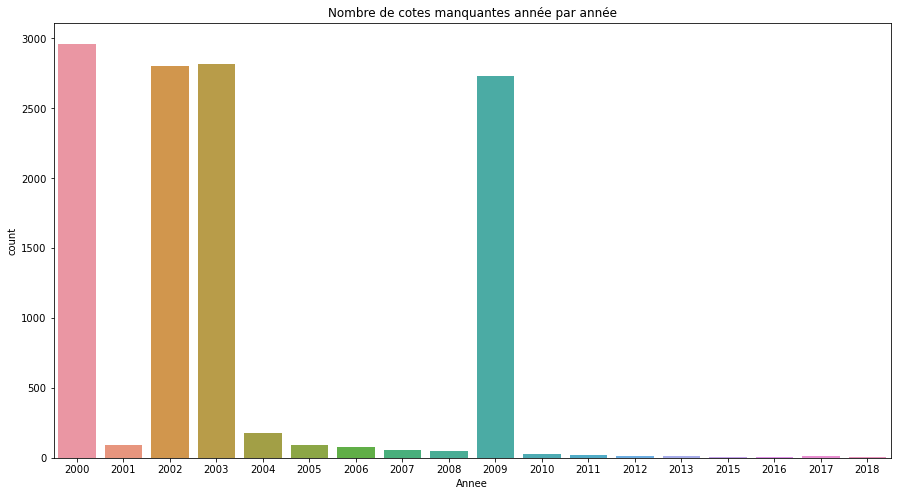

In [5]:
#On regarde la distribution des NA par anneé sur la colonne PSW qui en a le plus

dfmois=df.copy()

dfmois['Mois']=dfmois['Date'].dt.to_period('M')
dfmois['Annee']=dfmois['Date'].dt.to_period('Y')

plt.figure( figsize= (15, 8) );
plt.title('Nombre de cotes manquantes année par année')
sns.countplot(x='Annee', data=dfmois.loc[df['PSW'].isna(),['Annee']]);

#Il y a des valeurs non nulles seulement après 2004, et aucune en 2009. Partir de 2010 semble donc une bonne option
#df=df.drop(['Mois','Annee'], axis=1)


In [6]:
print(df[df['Date']>'2010-01-1'].isnull().sum())
#La quasi-totalité des valeurs manquantes de PSW, PSL, B65W et B365L est avant 2010
#Il y en a bien moins après 2010
#Les joueurs et les Series ayant changé avec les années, on a fait de choix de garder uniquement les données postérieures à 2010')


ATP             0
Location        0
Tournament      0
Date            0
Series          0
Court           0
Surface         0
Round           0
Best of         0
Winner          0
Loser           0
WRank           0
LRank           0
Wsets         110
Lsets         111
Comment         0
PSW           106
PSL           106
B365W          84
B365L          64
elo_winner      0
elo_loser       0
proba_elo       0
dtype: int64


In [7]:
#On nettoye en gardant uniquement à partir du 1er janvier 2010
df=df[df['Date']>='2010-01-1']
df.isnull().sum()
#Presque plus de valeurs manquantes. On va les nettoyer.

ATP             0
Location        0
Tournament      0
Date            0
Series          0
Court           0
Surface         0
Round           0
Best of         0
Winner          0
Loser           0
WRank           0
LRank           0
Wsets         110
Lsets         111
Comment         0
PSW           106
PSL           106
B365W          84
B365L          64
elo_winner      0
elo_loser       0
proba_elo       0
dtype: int64

Les matchs términés(Completed) sont les plus fréquents, et ce sont les seuls qui nous intéressent


C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Completed       18330
Retired           655
Walkover          105
Disqualified        1
Name: Comment, dtype: int64

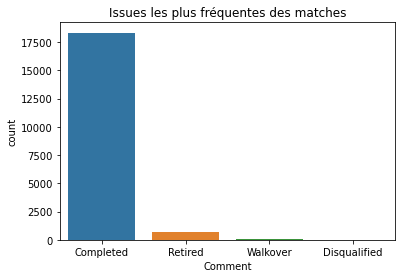

In [8]:
# Affichons un graphique nous permettant de savoir comment se terminent les matchs
#La variable ‘Comment’ est un commentaire sur le match soit Terminé, gagné par retraite du perdant ou via Walkover ou disqualifié  

sns.countplot(df.Comment);
plt.title('Issues les plus fréquentes des matches')
print('Les matchs términés(Completed) sont les plus fréquents, et ce sont les seuls qui nous intéressent')
df['Comment'].value_counts()

In [9]:
# En effet nous constatons que quelques matchs se terminent par des abandons ou des victoires faciles 
#Pour l'exercice nous garderons uniquement les matchs terminés ('Completed')
df=df[df['Comment']=='Completed']
#Il reste des valeurs nulles dans 4 colonnes : on va les supprimer
df.isnull().sum()


ATP             0
Location        0
Tournament      0
Date            0
Series          0
Court           0
Surface         0
Round           0
Best of         0
Winner          0
Loser           0
WRank           0
LRank           0
Wsets           0
Lsets           0
Comment         0
PSW           100
PSL           100
B365W          76
B365L          59
elo_winner      0
elo_loser       0
proba_elo       0
dtype: int64

In [10]:
# Suppression des valeurs manquantes dans ces 6 variables 

df=df.dropna(axis = 0, how = 'any', subset = ['B365L','B365W','PSL','PSW'])

df.isnull().sum().sort_values(ascending=False) # Vérification les valeurs manquantes
#Le dataset est nettoyé

ATP           0
LRank         0
elo_loser     0
elo_winner    0
B365L         0
B365W         0
PSL           0
PSW           0
Comment       0
Lsets         0
Wsets         0
WRank         0
Location      0
Loser         0
Winner        0
Best of       0
Round         0
Surface       0
Court         0
Series        0
Date          0
Tournament    0
proba_elo     0
dtype: int64

In [11]:
print(df.shape)
#18098 lignes: le dataset est sufisamment grand après nettoyage
print(df.info())

(18207, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 25617 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         18207 non-null  int64         
 1   Location    18207 non-null  object        
 2   Tournament  18207 non-null  object        
 3   Date        18207 non-null  datetime64[ns]
 4   Series      18207 non-null  object        
 5   Court       18207 non-null  object        
 6   Surface     18207 non-null  object        
 7   Round       18207 non-null  object        
 8   Best of     18207 non-null  int64         
 9   Winner      18207 non-null  object        
 10  Loser       18207 non-null  object        
 11  WRank       18207 non-null  int64         
 12  LRank       18207 non-null  int64         
 13  Wsets       18207 non-null  float64       
 14  Lsets       18207 non-null  float64       
 15  Comment     18207 non-null  object        
 16  PSW   

## Le dataset est nettoyé ! On passe à l'exploration de nos données

In [12]:
# Valeurs incohérentes
df['Wsets'].value_counts() #"On remarque qu'il y a 4 valeurs incohérentes dans le Wsets: 0 & 1  ")

2.0    14717
3.0     3486
0.0        2
1.0        2
Name: Wsets, dtype: int64

In [13]:
#un match gagné doit avoir au minimum 2 sets gagnants (Wsets). On vérifie qu'il n'y ait pas de valeurs aberrantes :
print(df[df['Wsets']<2].shape)
#4 matches aberrants à supprimer
#On supprime :
df=df[df['Wsets']>=2]


(4, 23)


2.0    14717
3.0     3486
Name: Wsets, dtype: int64

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diagrammme de Wsets des matchs ATP World Tour términés')

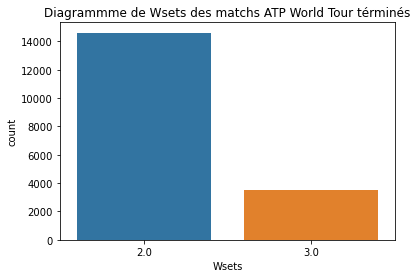

In [16]:
sns.countplot(df.Wsets);
plt.title('Diagrammme de Wsets des matchs ATP World Tour términés')

Les tournois ATP250 représentent la majorité (43%) des matches, les Masters Cup sont les plus rares
Les Masters Cup n'existent plus depuis 2009-2010 : remplacés par un autre tournoi


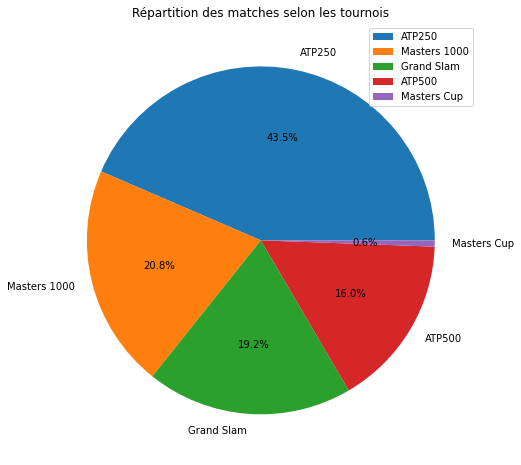

In [14]:
#On regarde quels sont les tournois (Series) les plus joués 
plt.figure( figsize= (8, 8) );
seriesdf=pd.DataFrame(df['Series'].value_counts())
plt.pie (seriesdf['Series'],labels=seriesdf.index, autopct='%1.1f%%');
plt.title('Répartition des matches selon les tournois');
plt.legend();
print('Les tournois ATP250 représentent la majorité (43%) des matches, les Masters Cup sont les plus rares')
print('Les Masters Cup n\'existent plus depuis 2009-2010 : remplacés par un autre tournoi')


on pourrait supprimer les matches de Masters Cup qui ne sont que très peu nombreux et n'apporteront rien à l'apprentissage


C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de matches sur chacun des tournois')

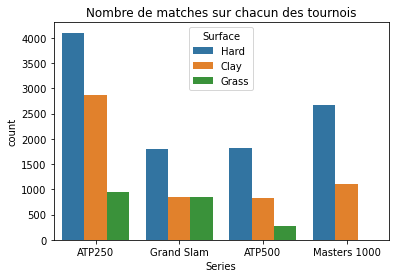

In [15]:
print('on pourrait supprimer les matches de Masters Cup qui ne sont que très peu nombreux et n\'apporteront rien à l\'apprentissage')
df=df[df['Series']!='Masters Cup']
sns.countplot(df.Series, hue=df.Surface);
plt.title('Nombre de matches sur chacun des tournois')

#On n'a désormais plus que 4 tournois équilibrés

Plus de la moitité des matches sont sur terrain dur, la terre battue un tiers et l'herbe est assez rare


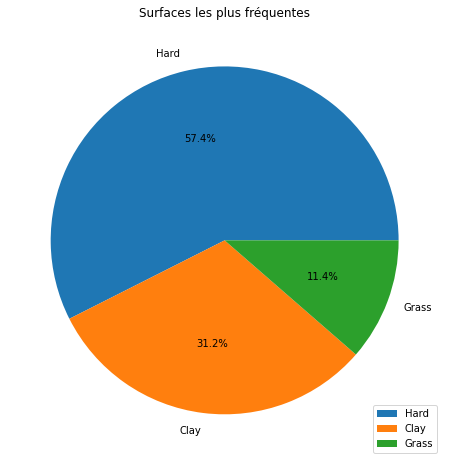

In [16]:
plt.figure( figsize= (8, 8) );
terrainsdf=pd.DataFrame(df['Surface'].value_counts())
plt.pie (terrainsdf['Surface'],labels=terrainsdf.index, autopct='%1.1f%%');
plt.title('Surfaces les plus fréquentes')
plt.legend();
print('Plus de la moitité des matches sont sur terrain dur, la terre battue un tiers et l\'herbe est assez rare')

Seuls les Matches du tournoi Grand Slam se jouent en 5 sets


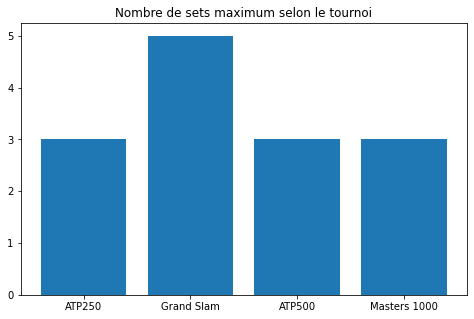

In [18]:
#Influence des tournois sur les matches
plt.figure( figsize= (8, 5) );

plt.bar(df['Series'],df['Best of']);
plt.title('Nombre de sets maximum selon le tournoi');
print('Seuls les Matches du tournoi Grand Slam se jouent en 5 sets')

In [19]:
# Grand Slam doit avoir 5 sets gagnants donc Best of = 5

slam=df[(df['Wsets']==3.0) & (df['Series']=='Grand Slam')]
print('Nombre de sets joués en grand slam : ',slam['Best of'].value_counts())
#On trouve 7 lignes incohérentes Best of=3 au lieu de Best of=5 dans la Variable Séries Grand Slam
print('Nombre de sets gagnants en grand slam : ',slam['Wsets'].value_counts())
#On a logiquement 3 sets gagnants soit la majorité des 5 sets max joués.


Nombre de sets joués en grand slam :  5    3479
3       7
Name: Best of, dtype: int64
Nombre de sets gagnants en grand slam :  3.0    3486
Name: Wsets, dtype: int64


In [20]:
#On trouve donc 7 lignes incohérentes Best of=3 au lieu de Best of=5 dans la Variable Séries Grand Slam

df.loc[df['Series']=='Grand Slam', 'Best of']=5 # Une correction sur les 7 lignes incohérentes
#Vérification de la variable Best of qui correspond aux Séries ATP 
fd=df[df["Best of"]==3]
dd=df[df["Best of"]==5]

print("Best of=3 : " ,fd["Series"].unique())
print("Best of=5 : " ,dd["Series"].unique())
#On vérifie que tous les Best Of 3 ont un Wsets 2 et Best of 5 ont un Wset 3 avec un crosstab :
print('\n ',pd.crosstab(df['Best of'], np.where(df['Wsets']==3,0,1)))

print('\n La variable Séries est maintenant corrigée avec le Nombre maximum de sets en match correct')


Best of=3 :  ['ATP250' 'ATP500' 'Masters 1000']
Best of=5 :  ['Grand Slam']

  col_0       0      1
Best of             
3           0  14612
5        3486      0

 La variable Séries est maintenant corrigée avec le Nombre maximum de sets en match correct


2.0    14612
3.0     3486
Name: Wsets, dtype: int64

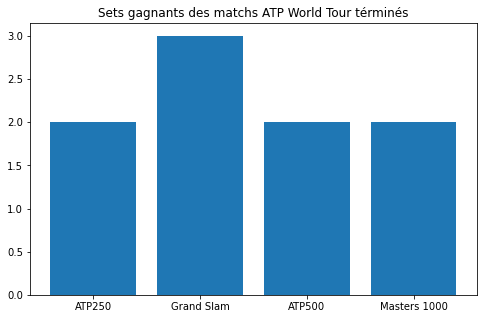

In [21]:
# Affichons un graphique nous permettant de vérifier les Wsets des matchs términés

plt.figure( figsize= (8, 5) );
plt.bar(df['Series'],df['Wsets']);
plt.title('Sets gagnants des matchs ATP World Tour términés');

#Les chiffres sont bon !

#Les matchs avec Wsets términés(Completed)
df['Wsets'].value_counts()

In [22]:
# Nbre de ligne et de variable
df.shape

(18098, 23)

In [24]:
#informations sur les variables : 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18098 entries, 25617 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         18098 non-null  int64         
 1   Location    18098 non-null  object        
 2   Tournament  18098 non-null  object        
 3   Date        18098 non-null  datetime64[ns]
 4   Series      18098 non-null  object        
 5   Court       18098 non-null  object        
 6   Surface     18098 non-null  object        
 7   Round       18098 non-null  object        
 8   Best of     18098 non-null  int64         
 9   Winner      18098 non-null  object        
 10  Loser       18098 non-null  object        
 11  WRank       18098 non-null  int64         
 12  LRank       18098 non-null  int64         
 13  Wsets       18098 non-null  float64       
 14  Lsets       18098 non-null  float64       
 15  Comment     18098 non-null  object        
 16  PSW         18098 

## Comparaison des bookmakers: qui a les meilleures cotes ?

In [25]:
dfext=df.copy().sort_values(by=['PSL'], ascending=False)
dfext.head()
 #Certains matches ont une cote extrème : Match 31959, Nadal contre le 246eme, PSL = 121 ! 0,8% de chances de défaite

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
31959,24,Barcelona,Open Banco Sabadell,2012-04-26,ATP500,Outdoor,Clay,3rd Round,3,Nadal R.,Farah R.,2,246,2.0,0.0,Completed,1.00,121.0,1.000,41.0,2156.184410,1494.225148,0.978343
33075,51,New York,US Open,2012-08-29,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Lorenzi P.,2,69,3.0,0.0,Completed,1.00,91.0,1.002,34.0,2225.065156,1449.779411,0.988603
30469,50,New York,US Open,2011-09-02,Grand Slam,Outdoor,Hard,2nd Round,5,Djokovic N.,Berlocq C.,1,74,3.0,0.0,Completed,1.01,86.0,1.002,34.0,2274.118741,1569.806286,0.982949
34888,32,Paris,French Open,2013-05-27,Grand Slam,Outdoor,Clay,1st Round,5,Nadal R.,Brands D.,4,59,3.0,1.0,Completed,1.01,81.0,1.002,29.0,2274.000400,1647.483063,0.973571
33110,51,New York,US Open,2012-08-31,Grand Slam,Outdoor,Hard,2nd Round,5,Federer R.,Phau B.,1,83,3.0,0.0,Completed,1.00,81.0,1.002,34.0,2261.534316,1515.345125,0.986552


In [26]:
print('La probabilité de victoire selon un bookmaker peut être calculée par l inverse de la côte : ex PSW et B365W du match 44527 de federer :')
print ('côte PSW : 1.29 / côte B365W: 1.25')
print('cela donne une proba victoire selon Pinnacle :',1/1.29,'proba selon B365 :',1/1.25)
print('Proba de victoire + proba de défaite doit être égal de 1 : la différence est la proba que le bookmaker encaisse')

La probabilité de victoire selon un bookmaker peut être calculée par l inverse de la côte : ex PSW et B365W du match 44527 de federer :
côte PSW : 1.29 / côte B365W: 1.25
cela donne une proba victoire selon Pinnacle : 0.7751937984496123 proba selon B365 : 0.8
Proba de victoire + proba de défaite doit être égal de 1 : la différence est la proba que le bookmaker encaisse


Répartition des cotes selont les surfaces et les séries, sur les 4 cotes : victoires ou défaites des 2 bookmakers


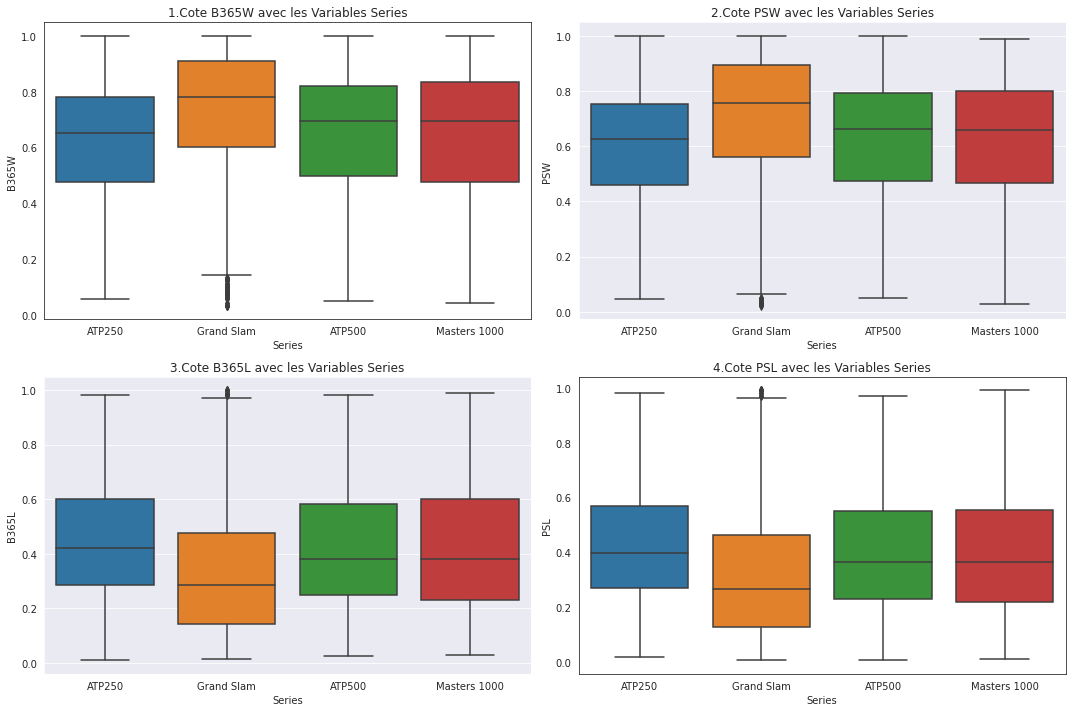

In [27]:
#y a-t-il des valeurs extremes ou aberrantes dans les cotes ?

f = plt.figure(figsize=(15, 10))

gs = f.add_gridspec(2, 2)
print('Répartition des cotes selont les surfaces et les séries, sur les 4 cotes : victoires ou défaites des 2 bookmakers')

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(x=df['Series'], y=1/df['B365W']);
    plt.title("1.Cote B365W avec les Variables Series")


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot(x=df['Series'], y=1/df['PSW']);
    plt.title("2.Cote PSW avec les Variables Series")
f.tight_layout()


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.boxplot(x=df['Series'], y=1/df['B365L']);
    plt.title("3.Cote B365L avec les Variables Series")
f.tight_layout()

with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 1])
    sns.boxplot(x=df['Series'], y=1/df['PSL']);
    plt.title("4.Cote PSL avec les Variables Series")    
f.tight_layout()


#sns.set(rc={'figure.figsize':(15,10)})
#sns.boxplot(x='Series', y='B365W', hue='Surface', data=df);
#sns.boxplot(x='Series', y='PSW', hue='Surface', data=df);

#Quel que soit le bookmaker, le côtes montrent beaucoup de valeurs extrèmes notamment sur le Grand Slam

In [31]:
cotes=['PSL'],['PSW'],['B365W'],['B365L']
dfcotes=pd.DataFrame(df.loc[:,(df.columns==cotes)])
dfcotes['PSW']=df['PSW']
dfcotes['PSL']=df['PSL']
dfcotes['B365W']=df['B365W']
dfcotes['B365L']=df['B365L']

dfcotes['cotesPS']=1/df['PSW']+1/df['PSL']
dfcotes['cotesB365']=1/df['B365W']+1/df['B365L']
print('moyenne des cotes PinnaCle Sports : ',dfcotes['cotesPS'].mean())
print('moyenne des cotes B365 Sports : ',dfcotes['cotesB365'].mean())
print('Les cotes Pinnacle sont plus favorables aux parieurs que celles de B365',"\n")

print('Voyons si c est régulier au fil des matches :')
print('ecart type des cotes Pinnacle : ',dfcotes['cotesPS'].std())
print('ecart type des cotes B365 : ',dfcotes['cotesB365'].std())
print('Pinnacle est très régulier dans ses cotes, B365 les change plus souvent selon les matches',"\n")

print('Synthése : Sur les deux cotes(PS & B365), il y a plus de valeurs abérantes sur')
print('            la cote B365, ce qui veut dire que la cote PS est plus fiable et que')
print('            les cotes Pinnacles Sports sont plus utilisées par les bookmakers \n')


print('Conclusion: \n')
print("Notre variable cible est definie par la fiabilité de la Cote et PS est la cote ")
print("la plus proche dans ce cas et la probabilité de la cote PSW (cote Pinnacle Sportif du ")
print("vainqueur du match (1/PSW)) sera notre variable cible pour définir un résultat gagnant ")
print("d'un matche entre le joeur A et le joueur B")

moyenne des cotes PinnaCle Sports :  1.0239998888625428
moyenne des cotes B365 Sports :  1.067151385052018
Les cotes Pinnacle sont plus favorables aux parieurs que celles de B365 

Voyons si c est régulier au fil des matches :
ecart type des cotes Pinnacle :  0.005451081110887228
ecart type des cotes B365 :  0.012448976745446615
Pinnacle est très régulier dans ses cotes, B365 les change plus souvent selon les matches 

Synthése : Sur les deux cotes(PS & B365), il y a plus de valeurs abérantes sur
            la cote B365, ce qui veut dire que la cote PS est plus fiable et que
            les cotes Pinnacles Sports sont plus utilisées par les bookmakers 

Conclusion: 

Notre variable cible est definie par la fiabilité de la Cote et PS est la cote 
la plus proche dans ce cas et la probabilité de la cote PSW (cote Pinnacle Sportif du 
vainqueur du match (1/PSW)) sera notre variable cible pour définir un résultat gagnant 
d'un matche entre le joeur A et le joueur B


In [32]:

#faire uen colonne (psw - PSL)
#on aura des valeurs négatives normalement
#Vérifier combien sont positives
#Du coup ca vérifie si le PSW c est lié au winner ou si c'est vraiment la cote de départ

#Comparer ensuite la proba de chacun au Winner réél


In [33]:
#Faire aussi une visualisation sur le Winner avec un countplot et hue = surface ?

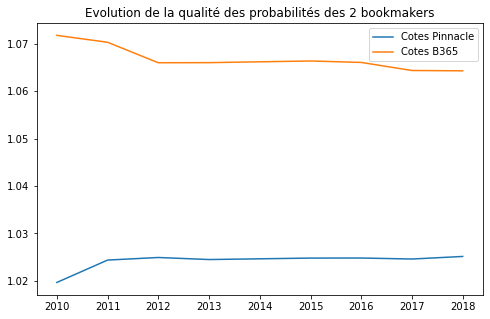

In [34]:
#Voyons l'évolution de la cote dans le temps
dfcotes['Date']=df['Date'].dt.year

cotesparM = dfcotes.groupby(['Date'], as_index = False).agg({'cotesPS':'mean','cotesB365':'mean'})
cotesparM.head(10)

dfcotes['Date']=df['Date'].dt.year
#Voyons l'évolution de la cote dans le temps selon les cotes et gains possibles par bookmakers

plt.figure( figsize= (8, 5) );
plt.plot(cotesparM['Date'],cotesparM['cotesPS'],label='Cotes Pinnacle')
plt.plot(cotesparM['Date'],cotesparM['cotesB365'],label='Cotes B365')
plt.title('Evolution de la qualité des probabilités des 2 bookmakers')
plt.legend();
#Les côtes B365 s'améliorent légèrement depuis 2017 et celles de Pinnacle sont assez stables
#Pinnacle reste bien plus proche de l'objectif (1)

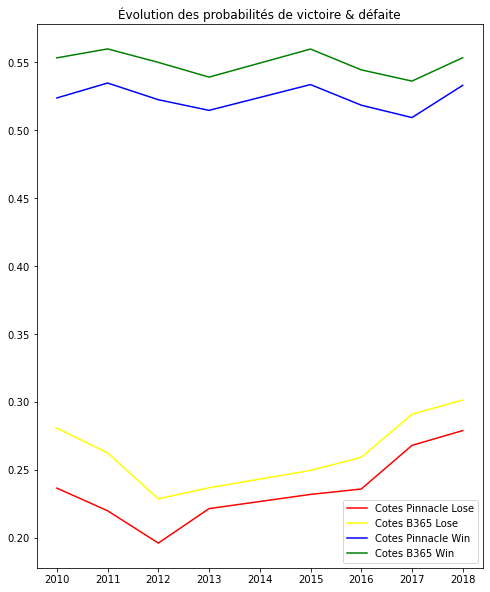

In [35]:
#Voyons l'évolution des probabilités victoire / défaite selon les 2 bookmakers
dfcotes['Date']=df['Date'].dt.year

plt.figure( figsize= (8, 10) );
cotesparM2 = dfcotes.groupby(['Date'], as_index = False).agg({'B365W':'mean','B365L':'mean','PSL':'mean','PSW':'mean'})
cotesparM2.head(10)
plt.plot(cotesparM2['Date'],(1/cotesparM2['PSL']),label='Cotes Pinnacle Lose', color="red")
plt.plot(cotesparM2['Date'],(1/cotesparM2['B365L']),label='Cotes B365 Lose', color="yellow")
plt.plot(cotesparM2['Date'],(1/cotesparM2['PSW']),label='Cotes Pinnacle Win', color="blue")
plt.plot(cotesparM2['Date'],(1/cotesparM2['B365W']),label='Cotes B365 Win', color="green")
plt.title('Évolution des probabilités de victoire & défaite')
plt.legend();
#Les bookmakers évoluent parallèlement
#Depuis 2012 les probabilités de défaites prédites sont plus fortes

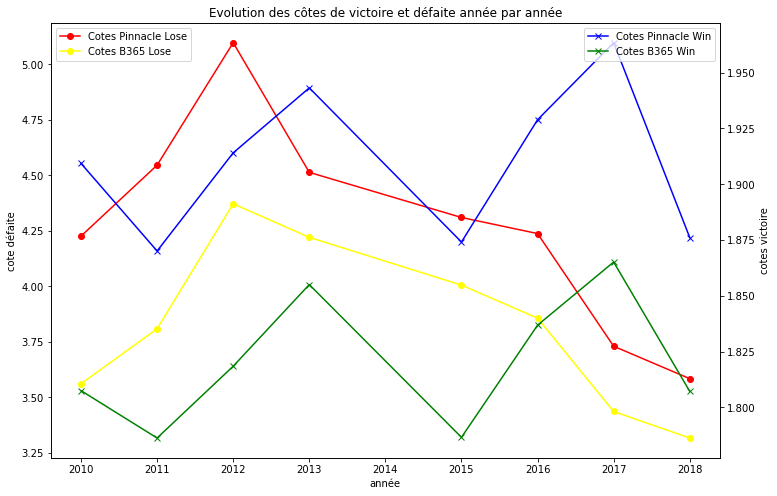

In [36]:
#Voyons l'évolution de la cote dans le temps selon les gains possibles

# create figure and axis objects with subplots()
fig,ax = plt.subplots();
fig.set_figheight(8)
fig.set_figwidth(12)
# make a plot
ax.plot(cotesparM2['Date'],cotesparM2['PSL'],label='Cotes Pinnacle Lose', color="red", marker="o");
ax.plot(cotesparM2['Date'],cotesparM2['B365L'],label='Cotes B365 Lose', color="yellow", marker="o");
plt.legend(loc='upper left')

# set x-axis label
ax.set_xlabel("année");
# set y-axis label
ax.set_ylabel("cote défaite",color="black");

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(cotesparM2['Date'],cotesparM2['PSW'],label='Cotes Pinnacle Win', color="blue",marker="x");
ax2.plot(cotesparM2['Date'],cotesparM2['B365W'],label='Cotes B365 Win', color="green",marker="x");
ax2.set_ylabel("cotes victoire",color="black");
plt.title('Evolution des côtes de victoire et défaite année par année');
plt.legend(loc='upper right')
plt.show();
#Les côtes de défaite des 2 bookmakers sont en baisse : il ya moins à grosses cotes de défaites. 
#Sont-ils plus sûrs de leur algo ? En tout cas on gagne moins qu'en 2012 à parier "contre"
#Pinnacle reste bien plus proche de l'objectif (1)

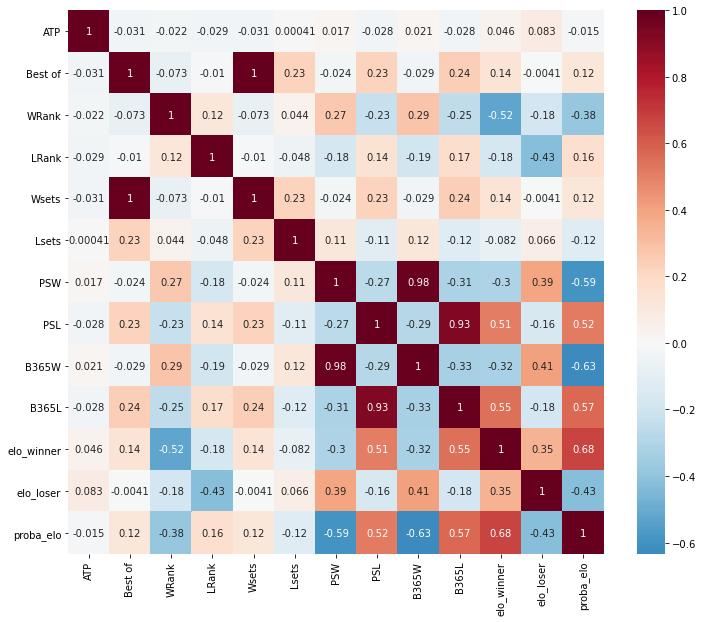

In [37]:
plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, center = 0, );

In [38]:
print('la prédiction Bet365 est proche de celle de Pinnacle Sports (PSW/B365W et PSL/B365L). Par contre c est assez éloigné de la proba donnée par le elo.')

la prédiction Bet365 est proche de celle de Pinnacle Sports (PSW/B365W et PSL/B365L). Par contre c est assez éloigné de la proba donnée par le elo.


#Comparer Winner et Elo_Winner : idée = % de match gagnés par joueur comparé à leur Elo


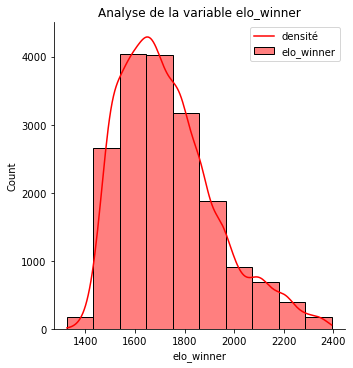

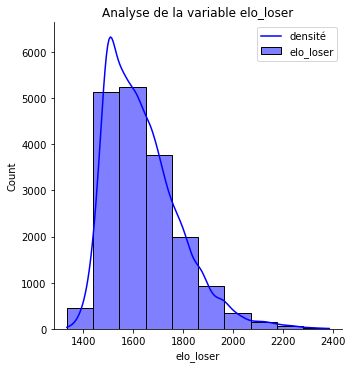

In [39]:
sns.displot(df["elo_winner"], bins=10, kde=True, color='red');
plt.title("Analyse de la variable elo_winner")
plt.legend(["densité","elo_winner"])


sns.displot(df["elo_loser"], bins=10, kde=True, color='blue');
plt.title("Analyse de la variable elo_loser")
plt.legend(["densité","elo_loser"]);

#La densité de elo > 2000 plonge chez les 'losers' : à partir de ce seuil lse joueurs ne perdent presque plus jamais


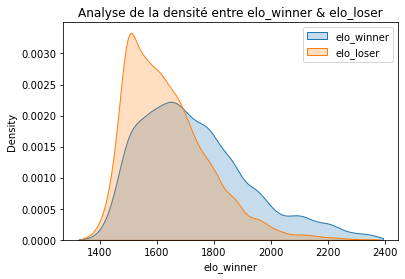

In [40]:
sns.kdeplot(df.elo_winner, shade=True, cut=0)
sns.kdeplot(df.elo_loser, shade=True, cut=0)
plt.title("Analyse de la densité entre elo_winner & elo_loser")
plt.legend(["elo_winner","elo_loser"]);
#Les joueurs "moyens" ayant un elo entre 1500 et 1700 sont très nombreux, et une faible proportion de joueurs elo > 2000 survole les compétitions

In [34]:
#Faire les quantiles des probabilités : les matches équilibrés 25 - 75%, les matches équilibrés 50%-50%... Les mettre dans 4 classes

In [41]:
# df trié selo nal variable Date
df = df.sort_values(by='Date').reset_index(drop=True)
df.head(5)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,3,Doha,Qatar Exxon Mobil Open,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Karlovic I.,Fognini F.,37,54,2.0,0.0,Completed,1.376,3.410,1.36,3.00,1700.586950,1564.557532,0.686337
1,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Falla A.,Chardy J.,81,32,2.0,0.0,Completed,2.580,1.581,2.62,1.44,1494.870839,1676.396972,0.260196
2,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Levy H.,Llodra M.,119,67,2.0,0.0,Completed,2.170,1.787,3.00,1.36,1325.868154,1663.757847,0.125094
3,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Stepanek R.,Millman J.,12,306,2.0,0.0,Completed,1.087,9.950,1.04,10.00,1872.712058,1500.000000,0.895248
4,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Roddick A.,Luczak P.,7,77,2.0,0.0,Completed,1.121,7.830,1.08,7.00,1934.828255,1431.488569,0.947721


## Définition de la cible 

In [42]:
#Définir la VARIABLE CIBLE 'target'

#On rajoute dans df la chance de victoire du meileur bookmaker : c'est à dire la cote PSW inversée

df['Cote'] = 1/df['PSW']

df

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo,Cote
0,3,Doha,Qatar Exxon Mobil Open,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Karlovic I.,Fognini F.,37,54,2.0,0.0,Completed,1.376,3.410,1.36,3.00,1700.586950,1564.557532,0.686337,0.726744
1,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Falla A.,Chardy J.,81,32,2.0,0.0,Completed,2.580,1.581,2.62,1.44,1494.870839,1676.396972,0.260196,0.387597
2,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Levy H.,Llodra M.,119,67,2.0,0.0,Completed,2.170,1.787,3.00,1.36,1325.868154,1663.757847,0.125094,0.460829
3,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Stepanek R.,Millman J.,12,306,2.0,0.0,Completed,1.087,9.950,1.04,10.00,1872.712058,1500.000000,0.895248,0.919963
4,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Roddick A.,Luczak P.,7,77,2.0,0.0,Completed,1.121,7.830,1.08,7.00,1934.828255,1431.488569,0.947721,0.892061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18093,17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,3,Bautista Agut R.,Pouille L.,23,15,2.0,0.0,Completed,1.650,2.430,1.66,2.20,1835.901543,1842.459807,0.490563,0.606061
18094,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,3,Anderson K.,Donaldson J.,8,59,2.0,1.0,Completed,1.340,3.630,1.30,3.50,1843.576914,1647.967561,0.755103,0.746269
18095,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,3,Jarry N.,Zeballos H.,73,69,2.0,1.0,Completed,1.850,2.090,1.90,1.90,1588.293069,1619.758421,0.454841,0.540541
18096,16,Acapulco,Abierto Mexicano,2018-03-04,ATP500,Outdoor,Hard,The Final,3,Del Potro J.M.,Anderson K.,9,8,2.0,0.0,Completed,1.520,2.750,1.50,2.62,1966.532849,1851.413609,0.659862,0.657895


In [43]:
###### La Variable cible 'target'
#On prend ici 4 cas de figure : les matches perdus d'avance / Equilibrés mais perdants / Equilibrés mais gagnats / Gagnés d'avance

print(df["Cote"].describe())

# Une solution
target=[]
for i in df["Cote"]:
    if i<=0.473934:
        target.append(0)# i<=25% plus grande de chance de perdre
    elif i<=0.657895:
        target.append(1)# 25<i<=50% plus de chance de perdre
    elif i<=0.800000: 
        target.append(2)# 50%<i<=75%  plus de chance de gagner
    else :
        target.append(3)# i>75%  plus grande de chance de gagner

# Une solution Avec la fonction qcut 
target = pd.qcut(df.Cote, labels=[0,1,2,3],q=4)
        
        
print(target)

count    18098.000000
mean         0.632984
std          0.210853
min          0.021739
25%          0.473934
50%          0.657895
75%          0.800000
max          1.000000
Name: Cote, dtype: float64
0        2
1        0
2        0
3        3
4        3
        ..
18093    1
18094    2
18095    1
18096    1
18097    2
Name: Cote, Length: 18098, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [44]:
len(target)

18098

Les Variables de type 'Objet' à transformer en variables numériques


In [45]:
# Les Variables avec type 'objet'

# Les Variables avec type 'objet'
cf=['Series','Court','Surface','Round','Comment','Winner','Loser','Location','Tournament']

#Label Encoding pour convertir les variables de type object à numerique
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cf:
    df[i] = le.fit_transform(df[i].astype(str))

print (df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18098 entries, 0 to 18097
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         18098 non-null  int64         
 1   Location    18098 non-null  int32         
 2   Tournament  18098 non-null  int32         
 3   Date        18098 non-null  datetime64[ns]
 4   Series      18098 non-null  int32         
 5   Court       18098 non-null  int32         
 6   Surface     18098 non-null  int32         
 7   Round       18098 non-null  int32         
 8   Best of     18098 non-null  int64         
 9   Winner      18098 non-null  int32         
 10  Loser       18098 non-null  int32         
 11  WRank       18098 non-null  int64         
 12  LRank       18098 non-null  int64         
 13  Wsets       18098 non-null  float64       
 14  Lsets       18098 non-null  float64       
 15  Comment     18098 non-null  int32         
 16  PSW         18098 non-

In [49]:
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo,Cote
0,3,23,79,2010-01-04,0,1,2,0,3,196,196,37,54,2.0,0.0,0,1.376,3.410,1.36,3.00,1700.586950,1564.557532,0.686337,0.726744
1,1,13,22,2010-01-04,0,1,2,0,3,121,102,81,32,2.0,0.0,0,2.580,1.581,2.62,1.44,1494.870839,1676.396972,0.260196,0.387597
2,1,13,22,2010-01-04,0,1,2,0,3,241,377,119,67,2.0,0.0,0,2.170,1.787,3.00,1.36,1325.868154,1663.757847,0.125094,0.460829
3,1,13,22,2010-01-04,0,1,2,0,3,393,426,12,306,2.0,0.0,0,1.087,9.950,1.04,10.00,1872.712058,1500.000000,0.895248,0.919963
4,1,13,22,2010-01-04,0,1,2,0,3,344,386,7,77,2.0,0.0,0,1.121,7.830,1.08,7.00,1934.828255,1431.488569,0.947721,0.892061


In [50]:
# Affichage le nombre de valeurs uniques pour chaque variable du dataframe.
df.nunique()

ATP              66
Location         87
Tournament      111
Date           1995
Series            4
Court             2
Surface           3
Round             7
Best of           2
Winner          452
Loser           708
WRank           444
LRank           687
Wsets             2
Lsets             3
Comment           1
PSW             889
PSL            1179
B365W            90
B365L            93
elo_winner    18016
elo_loser     17795
proba_elo     18091
Cote            889
dtype: int64

Les variables catégorielles et numériques

In [52]:
#Identifier les variables catégorielles et numériques dans deux listes distinctes

Cat_df=[]
Num_df=[]
for i in df:
    if (df[i].nunique())<=7:
        Cat_df.append(i)
    else:
        Num_df.append(i)

print("Variables Numérique de df : " , Num_df, '\n')

print("Variables Catégorielle de df : " , Cat_df)

Variables Numérique de df :  ['ATP', 'Location', 'Tournament', 'Date', 'Winner', 'Loser', 'WRank', 'LRank', 'PSW', 'PSL', 'B365W', 'B365L', 'elo_winner', 'elo_loser', 'proba_elo', 'Cote'] 

Variables Catégorielle de df :  ['Series', 'Court', 'Surface', 'Round', 'Best of', 'Wsets', 'Lsets', 'Comment']


Créer des modèles permettant de prédire : features & target


In [53]:
# Les variables dans feats=X
# La data frame est triée selon la date alors pour un match entre A et B on n'a pas besoin de date
# enlever les variables cote (1/PSW) et PSW, PSL, Wsets, Lsets, B365W, B365L car on essaye de les reproduire pas des les imiter

X=df.drop(['PSW','PSL', 'Cote','Wsets','Lsets', 'B365W','B365L','Date'], axis=1)

In [54]:
X.head(5)

,ATP,Location,Tournament,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Comment,elo_winner,elo_loser,proba_elo
0,3,23,79,0,1,2,0,3,196,196,37,54,0,1700.586950,1564.557532,0.686337
1,1,13,22,0,1,2,0,3,121,102,81,32,0,1494.870839,1676.396972,0.260196
2,1,13,22,0,1,2,0,3,241,377,119,67,0,1325.868154,1663.757847,0.125094
3,1,13,22,0,1,2,0,3,393,426,12,306,0,1872.712058,1500.000000,0.895248
4,1,13,22,0,1,2,0,3,344,386,7,77,0,1934.828255,1431.488569,0.947721


In [55]:
#la variable cible 'target' : y=target

y=target
print(y)

0        2
1        0
2        0
3        3
4        3
        ..
18093    1
18094    2
18095    1
18096    1
18097    2
Name: Cote, Length: 18098, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


Scikit-learn, une bibliothèque de machine learning-

In [56]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

In [57]:
# On partitionne les données en échantillon d'apprentissage et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=False)

# On récupère la moyenne et variance sur l'échantillon d'apprentissage 
scaler = preprocessing.StandardScaler().fit(X_train)

# On transforme l'échantillon d'apprentissage 
X_train_scaled = scaler.transform(X_train)

# On tranforme l'échantillon de test avec le "scaler" de l'échantillon d'apprentissage 
X_test_scaled = scaler.transform(X_test)

## Machine Learning:les 4 types d'algorithmes: Knn, SVM, Random Forest (RF) et Regression Logistique (RL)

KNN

In [59]:
# Algorithme Knn
knn = neighbors.KNeighborsClassifier()
parametres = {'n_neighbors': range(2,50)}
grid_knn = model_selection.GridSearchCV(estimator=knn, param_grid=parametres)

grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 50)})

In [60]:
grid_knn.best_params_ ### Paramètres retenus

{'n_neighbors': 40}

In [61]:
grid_knn.score(X_test_scaled, y_test) ## taux de bien classés

0.6102209944751381

In [62]:
# Calcul et affichage de classification_report

from sklearn.metrics import classification_report

y_pred = grid_knn.predict(X_test_scaled)
print( classification_report(y_test, y_pred) )


from sklearn.metrics import confusion_matrix
# matrice de confusion
y_pred = grid_knn.predict(X_test_scaled)
confusion_matrix=pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Classe réelle'],
                             colnames=['Classe prédite knn'],margins=True)
confusion_matrix

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       978
           1       0.51      0.47      0.49       961
           2       0.50      0.53      0.51       900
           3       0.71      0.71      0.71       781

    accuracy                           0.61      3620
   macro avg       0.61      0.61      0.61      3620
weighted avg       0.61      0.61      0.61      3620



Classe prédite knn,0,1,2,3,All
Classe réelle,,,,,
0,730,200,39,9,978
1,223,447,256,35,961
2,43,194,481,182,900
3,5,32,193,551,781
All,1001,873,969,777,3620


SVM

In [76]:
##Algorithme SVM
svm_clf = svm.SVC(probability=True)
parametres = {'C':[0.1,1,10,50],'kernel':['rbf','linear']}
grid_svm = model_selection.GridSearchCV(estimator=svm_clf, param_grid=parametres)
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 50], 'kernel': ['rbf', 'linear']})

In [77]:
grid_svm.best_params_ ### Paramètres retenus

{'C': 0.1, 'kernel': 'linear'}

In [78]:
grid_svm.score(X_test_scaled, y_test) ## taux de bien classés

0.6546961325966851

In [79]:
# Calcul et affichage de classification_report


y_pred = grid_svm.predict(X_test_scaled)
print( classification_report(y_test, y_pred) )


## matrice de confusion
y_pred = grid_svm.predict(X_test_scaled)

confusion_matrix=pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Classe réelle'],
                             colnames=['Classe prédite svm'],margins=True)
confusion_matrix


              precision    recall  f1-score   support

           0       0.77      0.77      0.77       978
           1       0.55      0.49      0.52       961
           2       0.55      0.62      0.58       900
           3       0.77      0.75      0.76       781

    accuracy                           0.65      3620
   macro avg       0.66      0.66      0.66      3620
weighted avg       0.66      0.65      0.65      3620



Classe prédite svm,0,1,2,3,All
Classe réelle,,,,,
0,752,195,27,4,978
1,191,474,267,29,961
2,28,169,561,142,900
3,3,24,171,583,781
All,974,862,1026,758,3620


Random Forest

In [80]:
# Algorithme Random Forest
rf = ensemble.RandomForestClassifier()

In [81]:
grid_rf = model_selection.GridSearchCV(estimator=rf, param_grid={
                                                                'max_features':
                                                                         ['auto','sqrt','log2',None],
                                                                'min_samples_split': range(2, 50)
                                                                }
                                      )
grid_rf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': range(2, 50)})

In [82]:
grid_rf.best_params_ ### Paramètres retenus

{'max_features': 'log2', 'min_samples_split': 44}

In [83]:
grid_rf.score(X_test_scaled,y_test) ## taux de bien classés

0.651657458563536

In [84]:
from sklearn.metrics import classification_report

# Calcul et affichage de classification_report


y_pred = grid_svm.predict(X_test_scaled)
print( classification_report(y_test, y_pred) )


## matrice de confusion
y_pred = grid_svm.predict(X_test_scaled)

confusion_matrix=pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Classe réelle'],
                             colnames=['Classe prédite svm'],margins=True)
confusion_matrix


              precision    recall  f1-score   support

           0       0.77      0.77      0.77       978
           1       0.55      0.49      0.52       961
           2       0.55      0.62      0.58       900
           3       0.77      0.75      0.76       781

    accuracy                           0.65      3620
   macro avg       0.66      0.66      0.66      3620
weighted avg       0.66      0.65      0.65      3620



Classe prédite svm,0,1,2,3,All
Classe réelle,,,,,
0,752,195,27,4,978
1,191,474,267,29,961
2,28,169,561,142,900
3,3,24,171,583,781
All,974,862,1026,758,3620


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [86]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [87]:
rf.feature_importances_

array([0.02063662, 0.01919845, 0.02046026, 0.00505061, 0.00146003,
       0.00515636, 0.00804735, 0.00606936, 0.0315421 , 0.03215957,
       0.04120852, 0.06219251, 0.        , 0.02729425, 0.02859042,
       0.69093359])

In [88]:
feats = {}
for feature, importance in zip(X.columns, rf.feature_importances_):
       feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(16)

,Importance
proba_elo,0.690934
LRank,0.062193
WRank,0.041209
Loser,0.032160
Winner,0.031542
elo_loser,0.028590
elo_winner,0.027294
ATP,0.020637
Tournament,0.020460
Location,0.019198


Regression logistique

In [67]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [68]:
#Avec la regression logique 

clf = LogisticRegression()
parametres={'C':[1.0],'tol':[0.0001],'max_iter':[100],           
            'warm_start':[False] , 'n_jobs':[None],
            'l1_ratio':[None],'penalty':['l1','l2','elasticnet', None],
            'dual':[False],'fit_intercept':[True],
            'intercept_scaling':[1], 'class_weight':[None],
            'random_state':[None], 'solver':['lbfgs'],
            'max_iter':[100], 'multi_class':['auto'],'verbose':[0]}
grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parametres)
grid_clf.fit(X_train_scaled, y_train)

clf.fit( X_train, y_train)
y_pred = clf.predict(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_se

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [69]:
grid_clf.best_params_ ### Paramètres retenus

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [70]:
grid_clf.score(X_test_scaled, y_test) ## taux de bien classés

0.6546961325966851

In [71]:
#  Importer la classe classification_report
from sklearn.metrics import classification_report

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred) )

# Calcul et affichage de la matrice de confusion
confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Classe réelle'],
                               colnames=['Classe prédite clf'],margins=True)
confusion_matrix # modèle LogisticRegression

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       978
           1       0.54      0.51      0.52       961
           2       0.52      0.54      0.53       900
           3       0.71      0.74      0.72       781

    accuracy                           0.63      3620
   macro avg       0.63      0.64      0.64      3620
weighted avg       0.63      0.63      0.63      3620



Classe prédite clf,0,1,2,3,All
Classe réelle,,,,,
0,750,199,28,1,978
1,198,486,247,30,961
2,24,190,482,204,900
3,5,22,177,577,781
All,977,897,934,812,3620


## Evaluation des modèles

In [75]:
print ('Le modèle fournit la meilleure précision est SVM & CLF avec 65,46%, contre')
print ('Random forest(RF) avec 65,11% et KNN avec 61,02%')

Le modèle fournit la meilleure précision est SVM & CLF avec 65,46%, contre
Random forest(RF) avec 65,11% et KNN avec 61,02%


## Test sur le ROI des paris

Disons qu'on parie 100€ sur Djokovic avec une côte de 1,3
- S'il gagne, on repart avec nos 100€ + 30€ de bénéfice => ROI de 30%
- S'il perd on perd nos 100€ => ROI de -100%


In [89]:

budget=100
dfroi=df.copy()
dfroi['PSgain_si_Win_€']=(budget*dfroi['PSW'])
dfroi['PSgain_si_Lose_€']=(budget*dfroi['PSL'])
dfroi['PSperte_%']=1-(1/dfroi['PSW'])
dfroi['PSroi']=((dfroi['PSgain_si_Win_€']*(1/dfroi['PSW']))-(dfroi['PSgain_si_Lose_€']*dfroi['PSperte_%'])) #La cote est une proba de victoire : on considère que c'est la proba de réaliser le gain

print('Si on parie sur tous les matches 100€ sur Pinnacle on gagne en moyenne :',dfroi['PSroi'].mean(),'€/match si on a toujours bon')
print('Gains moyens sur les victoires :',dfroi['PSgain_si_Win_€'].mean(),'€/match','avec une proba moyenne de ',(1/dfroi['PSW']).mean(),'%')
print('Gains moyens sur les défaites :',dfroi['PSgain_si_Lose_€'].mean(),'€/match','avec une proba moyenne de ',(1/dfroi['PSL']).mean(),'%')


Si on parie sur tous les matches 100€ sur Pinnacle on gagne en moyenne : 9.883310393453856 €/match si on a toujours bon
Gains moyens sur les victoires : 191.32936236048184 €/match avec une proba moyenne de  0.6329844526673949 %
Gains moyens sur les défaites : 435.6051000110509 €/match avec une proba moyenne de  0.3910154361951676 %


In [90]:
dfroi['B365gain_si_Win_€']=(budget*dfroi['B365W'])
dfroi['B365gain_si_Lose_€']=(budget*dfroi['B365L'])
dfroi['B365perte_%']=1-(1/dfroi['B365W'])
dfroi['B365roi']=((dfroi['B365gain_si_Win_€']*(1/dfroi['PSW']))-(dfroi['B365gain_si_Lose_€']*dfroi['B365perte_%'])) #La cote est une proba de victoire : on considère que c'est laproba de réalsier le gain
print('Si on parie sur tous les matches 100€ sur Bet365 on gagne en moyenne ',dfroi['B365roi'].mean(),'€/match si on a toujours bon')
print('Gains moyens sur les victoires :',dfroi['B365gain_si_Win_€'].mean(),'€/match','avec une proba moyenne de ',(1/dfroi['B365W']).mean(),'%')
print('Gains moyens sur les défaites :',dfroi['B365gain_si_Lose_€'].mean(),'€/match','avec une proba moyenne de ',(1/dfroi['B365L']).mean(),'%')


Si on parie sur tous les matches 100€ sur Bet365 on gagne en moyenne  18.92938630219947 €/match si on a toujours bon
Gains moyens sur les victoires : 182.15212178141226 €/match avec une proba moyenne de  0.6563200971970529 %
Gains moyens sur les défaites : 387.55269090507244 €/match avec une proba moyenne de  0.4108312878549511 %


In [91]:
dfroi.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo,Cote,PSgain_si_Win_€,PSgain_si_Lose_€,PSperte_%,PSroi,B365gain_si_Win_€,B365gain_si_Lose_€,B365perte_%,B365roi
0,3,23,79,2010-01-04,0,1,2,0,3,196,196,37,54,2.0,0.0,0,1.376,3.410,1.36,3.00,1700.586950,1564.557532,0.686337,0.726744,137.6,341.0,0.273256,6.819767,136.0,300.0,0.264706,19.425445
1,1,13,22,2010-01-04,0,1,2,0,3,121,102,81,32,2.0,0.0,0,2.580,1.581,2.62,1.44,1494.870839,1676.396972,0.260196,0.387597,258.0,158.1,0.612403,3.179070,262.0,144.0,0.618321,12.512220
2,1,13,22,2010-01-04,0,1,2,0,3,241,377,119,67,2.0,0.0,0,2.170,1.787,3.00,1.36,1325.868154,1663.757847,0.125094,0.460829,217.0,178.7,0.539171,3.650230,300.0,136.0,0.666667,47.582181
3,1,13,22,2010-01-04,0,1,2,0,3,393,426,12,306,2.0,0.0,0,1.087,9.950,1.04,10.00,1872.712058,1500.000000,0.895248,0.919963,108.7,995.0,0.080037,20.363385,104.0,1000.0,0.038462,57.214634
4,1,13,22,2010-01-04,0,1,2,0,3,344,386,7,77,2.0,0.0,0,1.121,7.830,1.08,7.00,1934.828255,1431.488569,0.947721,0.892061,112.1,783.0,0.107939,15.483497,108.0,700.0,0.074074,44.490699


In [130]:
#Si on parie uniquement sur les victoires et les défaites de notre modèle Random Forest


In [92]:
# On ajoute les prédictions du random forest au dfroi
X_scaled = scaler.transform(X)

y_pred_total = grid_rf.predict(X_scaled)

dfroi['Predit']=y_pred_total
dfroi['Reel']=y

BonnePrediction=[]
#for ligne in dfroi['Predit']:
#    if ligne==dfroi['Reel'][ligne]:
#        BonnePrediction.append(1)
#    else: BonnePrediction.append(0)

BonnePrediction=dfroi[dfroi['Predit']==(dfroi['Reel'])]


BonnePrediction

print('avec le Random Forest on a ',BonnePrediction.shape[0],'bonnes prédictions sur ',dfroi.shape[0])

avec le Random Forest on a  13220 bonnes prédictions sur  18098


In [93]:
#Si on parie sur tous les matches : ROI en €

gainse=BonnePrediction['PSgain_si_Win_€'].sum() #Gains en € sur les paris gagnés

badPrediction=dfroi[dfroi['Predit']!=(dfroi['Reel'])]
pertese=budget*badPrediction.shape[0] #Pertes e, # sur les paris perdus

#ROI en % : 
roips=((BonnePrediction['PSgain_si_Win_€'].sum()-pertese)-(budget*dfroi.shape[0]))/dfroi.shape[0]

print('Le ROi de tous les paris selon notre random Forest serait de : ',roips,'%')


Le ROi de tous les paris selon notre random Forest serait de :  19.341634434744165 %


In [94]:
#On calcule le ROI si on parie 100€ sur tous les matches a prédiction 3 (surs)
dfp0=dfroi.loc[dfroi['Predit']==0].copy()
dfp1=dfroi.loc[dfroi['Predit']==1].copy()
dfp2=dfroi.loc[dfroi['Predit']==2].copy()
dfp3=dfroi.loc[dfroi['Predit']==3].copy()


BonnePredictionp0=dfp0[dfp0['Reel']==0]
gainsp0=BonnePredictionp0['PSgain_si_Lose_€'].sum()+BonnePredictionp1['PSgain_si_Win_€'].sum()#ici on parie sur la défaite 
badPredictionp0=dfp0[dfp0['Reel']==0] #<2 = défaite
pertesp0=budget*badPredictionp0.shape[0]

BonnePredictionp1=dfp1[dfp1['Reel']==1]
gainsp1=BonnePredictionp1['PSgain_si_Lose_€'].sum()+BonnePredictionp0['PSgain_si_Win_€'].sum()#ici on parie sur la défaite 
badPredictionp1=dfp1[dfp1['Reel']==1]
pertesp1=budget*badPredictionp1.shape[0]

BonnePredictionp2=dfp2[dfp2['Reel']==2] #>1 = victoire
gainsp2=BonnePredictionp2['PSgain_si_Win_€'].sum()+BonnePredictionp3['PSgain_si_Win_€'].sum() #ici on parie sur la victoire 
badPredictionp2=dfp2[dfp2['Reel']==2]
pertesp2=budget*badPredictionp2.shape[0]

BonnePredictionp3=(dfp3[dfp3['Reel']==3]) 
gainsp3=BonnePredictionp3['PSgain_si_Win_€'].sum()+BonnePredictionp2['PSgain_si_Win_€'].sum() #ici on parie sur la victoire
badPredictionp3=dfp3[dfp3['Reel']==3]
pertesp3=budget*badPredictionp3.shape[0]



#ROI en % : 
roipsp0=((gainsp0-pertesp0)-(budget*dfp0.shape[0]))/dfp0.shape[0]
roipsp1=((gainsp1-pertesp1)-(budget*dfp1.shape[0]))/dfp1.shape[0]
roipsp2=((gainsp2-pertesp2)-(budget*dfp2.shape[0]))/dfp2.shape[0]
roipsp3=((gainsp3-pertesp3)-(budget*dfp3.shape[0]))/dfp3.shape[0]




#Résultat
print('on gagne en moyenne : ',(gainsp0-pertesp0)/dfp0.shape[0],'€/match en pariant',budget,'€ sur les',dfp0.shape[0],'matches à prédiction 0 (défaite certaine)')
print('on gagne en moyenne : ',(gainsp1-pertesp1)/dfp1.shape[0],'€/match en pariant',budget,'€ sur les',dfp1.shape[0],'matches à prédiction 1 (défaite possible)')
print('on gagne en moyenne : ',(gainsp2-pertesp2)/dfp2.shape[0],'€/match en pariant',budget,'€ sur les',dfp2.shape[0],'matches à prédiction 2 (victoire possible)')
print('on gagne en moyenne : ',(gainsp3-pertesp3)/dfp3.shape[0],'€/match en pariant',budget,'€ sur les',dfp3.shape[0],'matches à prédiction 3 (victoire certaine)')

print('parier sur les défaites semble rapporter davantage :')
print('ROI en % : ',roipsp0,'% sur les predictions0',roipsp1,'% sur les predictions1',roipsp2,'% sur les predictions2',roipsp3,'% sur les predictions3')

NameError: name 'BonnePredictionp1' is not defined

In [ ]:
#Résultat
#print('on gagnerait en moyenne : ',dfp0['PSgain_si_Win_€'].mean(),'€  à chaque match si on pariait',budget,'€ sur les',dfp0.shape[0],'matches à prédiction 0')
#print('on gagnerait en moyenne : ',dfp1['PSgain_si_Win_€'].mean(),'€  à chaque match si on pariait',budget,'€ sur les',dfp1.shape[0],'matches à prédiction 1')
#print('on gagnerait en moyenne : ',dfp2['PSgain_si_Win_€'].mean(),'€  à chaque match si on pariait',budget,'€ sur les',dfp2.shape[0],'matches à prédiction 2')
#print('on gagnerait en moyenne : ',dfp3['PSgain_si_Win_€'].mean(),'€  à chaque match si on pariait',budget,'€ sur les',dfp3.shape[0],'matches à prédiction 3')


In [ ]:
#Piste en cours d'élaboration !!!

predictions = {'reel'  : y_test,
                'prédit':y_pred,}

# Creation du DataFrame
predict= pd.DataFrame(predictions)
parié=[]
for ligne in predict['prédit']:
    if ligne==3:
        parié.append(budget)
    else:
        parié.append(0)
predict['Pari']=parié

resultat=[]
for prediction in predict['reel']:
    if prediction==3:
        resultat.append(100)
    else:
        resultat.append(0)

predict['resultat']=resultat
resultat


#predict.head(50)
#print('parié : ',predict['Pari'].sum())
#print('résultat : ',predict['resultat'].sum())

In [ ]:
predict.head(45)